https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_LQD

In [3]:
X = data_LQD.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=102.489112, expected=100.404419
predicted=100.930345, expected=100.606331
predicted=100.656728, expected=101.188171
predicted=101.234318, expected=99.816086
predicted=100.205222, expected=100.267639
predicted=100.298610, expected=100.197319
predicted=100.348711, expected=100.554390
predicted=100.604783, expected=100.911476
predicted=100.979170, expected=101.329514
predicted=101.375746, expected=100.911476
predicted=101.127623, expected=100.805496
predicted=100.945648, expected=101.320808
predicted=101.353264, expected=100.744362
predicted=100.986487, expected=101.364441
predicted=101.364254, expected=101.275055
predicted=101.430356, expected=101.826866
predicted=101.839118, expected=101.397667
predicted=101.622401, expected=101.818100
predicted=101.850528, expected=102.041618
predicted=102.138509, expected=102.770699
predicted=102.750174, expected=102.920082
predicted=103.034918, expected=102.270004
predicted=102.522608, expected=100.803009
predicted=101.203244, expected=101.

predicted=114.596313, expected=115.154167
predicted=115.235339, expected=116.819504
predicted=116.715065, expected=117.322052
predicted=117.467001, expected=116.819504
predicted=117.108647, expected=117.636360
predicted=117.671265, expected=117.201469
predicted=117.453286, expected=118.249146
predicted=118.226910, expected=117.547394
predicted=117.842014, expected=117.826096
predicted=117.908085, expected=118.212700
predicted=118.283863, expected=118.688538
predicted=118.755203, expected=119.778969


In [9]:
error_LQD = math.sqrt(mean_squared_error(test, predictions))
%store error_LQD
print('Test RMSE: %.3f' % error_LQD)

Stored 'error_LQD' (float)
Test RMSE: 0.739


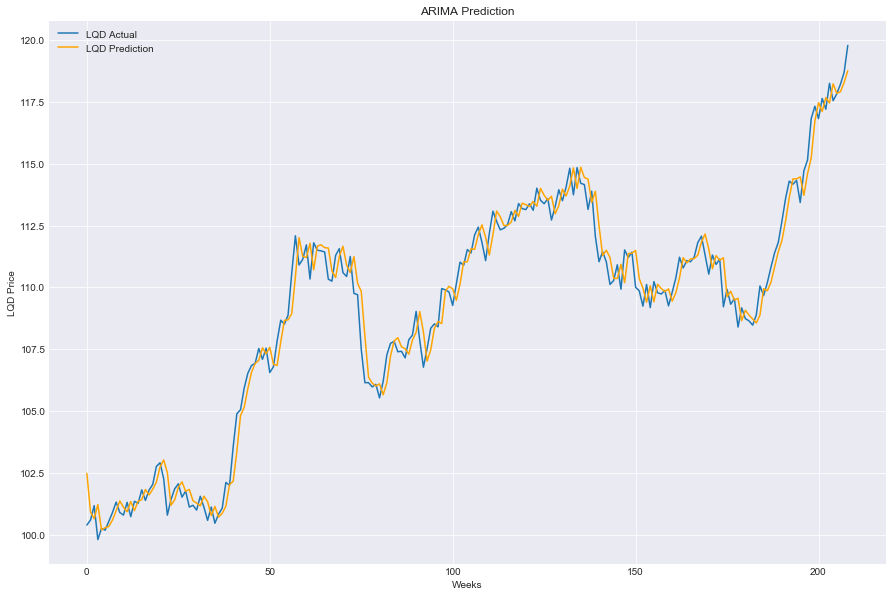

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'LQD Actual')
plt.plot(predictions, color='orange', label = 'LQD Prediction')
plt.xlabel('Weeks')
plt.ylabel('LQD Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_LQD = pd.DataFrame(predictions) 
ARIMA_pred_LQD.columns = ['ARIMA_pred_LQD']
%store ARIMA_pred_LQD

Stored 'ARIMA_pred_LQD' (DataFrame)
